___DESAFIO PROJETO ANÁLISE DE DADOS EM PYTHON___

In [1]:
#IMPORTAÇÕES
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

In [2]:
#LÊ O ARQUIVO .CSV
df = pd.read_csv('chamada_regular_sisu_2022_1.csv', sep='|', encoding='latin-1')

C:\Users\Gabriela\AppData\Local\Temp\ipykernel_13392\2534230214.py:2: DtypeWarning: Columns (17,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('chamada_regular_sisu_2022_1.csv', sep='|', encoding='latin-1')


In [3]:
#ARMAZENA TUDO EM SCRING
head_output = df.head().to_string()

In [4]:
#CONTA A QUANTIDADE DE LINHAS NO DATAFRAME 'df'
total_de_inscritos = df.shape[0]

In [5]:
#PRINT O NOME DAS COLUNAS
print(df.head())
print(df.columns)

    ANO  EDICAO  ETAPA         DS_ETAPA  CODIGO_IES  \
0  2022       1      4  CHAMADA REGULAR         593   
1  2022       1      4  CHAMADA REGULAR         593   
2  2022       1      4  CHAMADA REGULAR         593   
3  2022       1      4  CHAMADA REGULAR         593   
4  2022       1      4  CHAMADA REGULAR         593   

                                            NOME_IES SIGLA_IES UF_IES  \
0  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
1  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
2  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
3  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
4  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   

   CODIGO_CAMPUS                NOME_CAMPUS  ... NOTA_L_COM_PESO  \
0           1663  CEFET-RJ - MARIA DA GRAÇA  ...           564,8   
1           1663  CEFET-RJ - MARIA DA GRAÇA  ...             650   
2           1663  CEFET-RJ

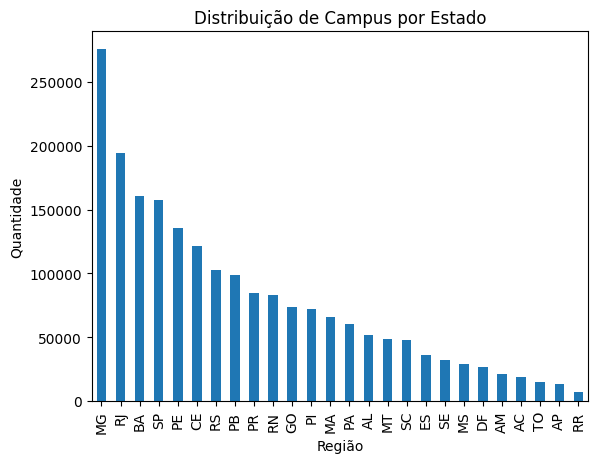

In [6]:
#TRANSFORMA O CAMPO 'UF_CAMPUS' em 'campus_por_estado'
campus_por_estado = df['UF_CAMPUS'].value_counts() #sem limitar a quantidade de estados

#CRIA A IMAGEM DO GRÁFICO
campus_por_estado_plot = 'campus_por_estado.png'
campus_por_estado.plot(kind='bar')
plt.xlabel('Região') #define o que aparece no eixo x
plt.ylabel('Quantidade') #define o que aparece no eixo y
plt.title('Distribuição de Campus por Estado') #define o titulo
plt.savefig(campus_por_estado_plot) #salva em imagem
plt.show() #mostra o gráfico gerado
plt.close()

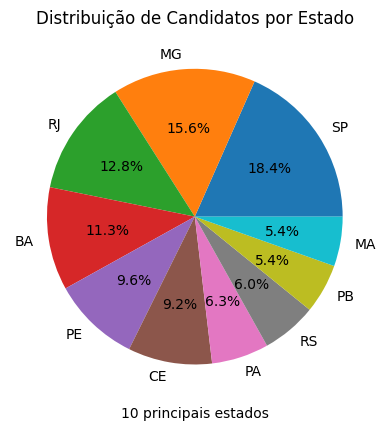

In [7]:
#TRANSFORMA O CAMPO 'UF_CANDIDATO' em 'candidatos_por_estado'
candidato_por_estado = df['UF_CANDIDATO'].value_counts().nlargest(10) #limita a quantidade de estados para os 10 primeiros

#CRIA A IMAGEM DO GRÁFICO
candidato_por_estado_plot = 'candidato_por_estado.png'
candidato_por_estado.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('10 principais estados') #define o que aparece no eixo x
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.title('Distribuição de Candidatos por Estado') #define o titulo
plt.savefig(candidato_por_estado_plot) #salva em imagem
plt.show() #mostra o gráfico gerado
plt.close()

In [118]:
#CONVERTE O VALOR EM PORCENTAGEM, DIVIDINDO O VALOR DE 'total_de_inscritos' POR 'candidatos_por_estado' 
porcentagens = (candidato_por_estado / total_de_inscritos) * 100

In [119]:

#INICIA O DOCUMENTO PDF
pdf = FPDF()

pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

#INICIO DA CAPA
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Gabriela Rebeca Martins Soares - KICK 2024', 2, 1, 'C')

pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 120, 'ANÁLISE DE UNIVERSIDADES E CANDIDATOS POR ESTADO', 2, 1, 'C')

pdf.set_font('Arial', 'B', size=14)
pdf.multi_cell(0, 10, "Esse relátorio tem o objetivo de analisar a quantidade de instituições de ensino superior por estado e comparar com a quantidade de candidatos inscritos" , align='C')

pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 80, 'Projeto de Analise de Dados do SISU 2022', 2, 1, 'C')


In [120]:
pdf.add_page()
pdf.set_font('Arial', 'B', size=12)
pdf.cell(0, 10, 'Intrudução', ln=True, align='C')

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "A educação superior desempenha um papel crucial no desenvolvimento social e econômico de um país. No Brasil, a diversidade das universidades, tanto públicas quanto privadas, reflete as características regionais e as necessidades locais de cada estado. A análise da quantidade de faculdades e candidatos por estado é fundamental para compreender a dinâmica do ensino superior no Brasil. Este relatório tem como objetivo examinar essa relação, destacando a oferta e a demanda educacional em diferentes regiões do país. Ao identificar áreas com maior concorrência e aquelas que carecem de instituições de ensino, podemos fornecer subsídios para a formulação de políticas públicas que promovam a equidade no acesso à educação.")
pdf.ln(5)

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "Além disso, essa análise permite uma avaliação mais aprofundada da qualidade educacional, possibilitando que estudantes e suas famílias façam escolhas informadas sobre suas trajetórias acadêmicas. Ao mapear esses dados, buscamos contribuir para um panorama mais claro do cenário educacional brasileiro e das necessidades dos candidatos, promovendo uma educação superior mais inclusiva e de qualidade.")
pdf.ln(5)

pdf.set_font('Arial', 'B', size=12)
pdf.cell(0, 10, 'Relatório de Inscritos', ln=True, align='C', border=1)
pdf.set_font('Arial', size=20)
pdf.cell(0, 20, f'Total de Inscritos: {total_de_inscritos}', ln=True, align='C', border=1)
pdf.ln(5)

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "Em 2022, o Brasil registrou um total de 2.032.674 candidatos inscritos no Sistema de Seleção Unificada (SiSU), refletindo um interesse significativo pela educação superior no país. Esse número expressivo não apenas demonstra a crescente busca por oportunidades acadêmicas, mas também supera as quantidades registradas nos anos de 2023 e 2024. A análise dessa variação é fundamental para entender as tendências na demanda por ensino superior e suas implicações para a oferta de instituições educacionais em todo o território brasileiro. Ao considerar esses dados, podemos avaliar melhor o cenário educacional e os desafios que os candidatos enfrentam na escolha de suas trajetórias acadêmicas.")
pdf.ln(5)

pdf.set_font('Arial', 'B', size=12)
pdf.cell(0, 10, 'Analise de Dados', ln=True, align='C')

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "A distribuição das faculdades públicas pelo território nacional é crucial para entender o acesso à educação superior em diferentes regiões. O gráfico a seguir ilustra essa distribuição, evidenciando as disparidades regionais e como elas impactam o número de candidatos. Essa análise permite identificar áreas com maior concentração de instituições, bem como regiões que podem carecer de mais opções de ensino superior, destacando a importância de políticas educacionais direcionadas para equilibrar essa oferta e garantir que todos os estudantes tenham acesso a oportunidades acadêmicas de qualidade.")
pdf.ln(5)

pdf.image(campus_por_estado_plot, x=10, y=None, w=pdf.w - 20)
pdf.ln(5)

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "Em 2022, os cinco estados com o maior número de campus de instituições públicas foram: 1. Minas Gerais, 2. Rio de Janeiro, 3. Bahia, 4. São Paulo e 5. Pernambuco. Essa concentração de instituições em determinados estados revela não apenas a importância histórica e cultural dessas regiões, mas também suas capacidades de atrair e oferecer educação superior.")
pdf.ln(5)

In [121]:

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "A presença de múltiplos campus pode facilitar o acesso dos estudantes e contribuir para o desenvolvimento regional, promovendo a formação de um capital humano qualificado. Analisar essa distribuição é fundamental para entender as oportunidades disponíveis para os candidatos em diferentes partes do Brasil.")
pdf.ln(5)
pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "Regiões com alta concentração de candidatos podem indicar uma necessidade maior de instituições, enquanto áreas com poucos candidatos podem revelar desafios no acesso ou interesse pela educação. Essa relação impacta diretamente na formulação de políticas educacionais, possibilitando o direcionamento de recursos e a criação de programas que atendam às demandas locais. Além disso, entender essa dinâmica ajuda a identificar possíveis lacunas no mercado de trabalho e a adequar a oferta de cursos às necessidades regionais.")


pdf.image(candidato_por_estado_plot, x=10, y=None, w=pdf.w - 20)

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "Os estados com o maior número de candidatos em 2022 foram: 1. São Paulo, 2. Minas Gerais, 3. Rio de Janeiro, 4. Bahia e 5. Pernambuco. Ao comparar esses números com a quantidade de faculdades por estado, observa-se que São Paulo, com uma significativa concentração de instituições de ensino superior, abriga a maior parte dos candidatos, refletindo sua posição como um polo educacional e econômico. Minas Gerais e Rio de Janeiro também apresentam um número considerável de faculdades, o que se alinha com a alta demanda por educação nesses estados.")
pdf.ln(5)
pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "Por outro lado, Bahia e Pernambuco, apesar de também figurarem entre os estados com muitos candidatos, podem ter uma proporção diferente de instituições, indicando uma possível necessidade de expansão na oferta de cursos. Essa comparação revela disparidades importantes: estados com grande número de candidatos que não possuem faculdades suficientes podem enfrentar desafios em termos de acesso à educação superior, enquanto aqueles com uma boa oferta educacional conseguem atender melhor a demanda. Essa análise é crucial para o desenvolvimento de estratégias que visem equilibrar a oferta e a demanda, promovendo um acesso mais igualitário à educação.")
pdf.ln(10)

pdf.set_font('Arial', 'B', size=12)
pdf.cell(0, 10, 'Conclusão', ln=True, align='C')

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "A análise da relação entre a quantidade de faculdades e o número de candidatos por estado revela importantes insights sobre o cenário educacional brasileiro. Identificamos que os estados com maior concentração de instituições, como São Paulo e Minas Gerais, também apresentam um elevado número de candidatos, indicando uma oferta relativamente adequada para atender à demanda. Por outro lado, estados como Bahia e Pernambuco, embora figurando entre os que têm mais candidatos, podem carecer de um número suficiente de faculdades, o que sugere a necessidade de políticas que incentivem a expansão da educação superior nessas regiões.")
pdf.ln(5)

pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, "Esses dados são essenciais para a formulação de estratégias que busquem equilibrar a oferta e a demanda por educação, garantindo que todos os estudantes tenham acesso a oportunidades acadêmicas de qualidade. Ao abordar as disparidades regionais e a relação entre faculdades e candidatos, podemos contribuir para um sistema educacional mais justo e inclusivo, promovendo o desenvolvimento econômico e social em todas as partes do país. A continuidade da pesquisa nesse campo é fundamental para acompanhar as mudanças e ajustar as políticas educacionais de acordo com as necessidades emergentes da população.")
pdf.ln(5)

pdf.set_font('Arial', 'B', size=12)
pdf.cell(0, 10, 'Detalhes de Candidatos por Estado:', ln=True, align='C', border=1)
for estado, quantidade in candidato_por_estado.items():
    porcentagem = porcentagens[estado]
    pdf.cell(0, 10, f"{estado}: {quantidade} candidatos ({porcentagem:.1f}%)", ln=True, align='C', border=1)

In [122]:
pdf.output('AnaliseMEC.pdf')
print("PDF gerado com sucesso!")

PDF gerado com sucesso!
